In [2]:
pip install pycaret[full]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
from google.colab import files
uploads = files.upload()

Saving Groceries_dataset.csv to Groceries_dataset (1).csv


In [5]:
dataset = pd.read_csv('Groceries_dataset.csv')
dataset.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
dataset.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
transactions = dataset.groupby('Member_number')['itemDescription'].apply(list).values.tolist()


In [13]:
# Use TransactionEncoder to convert the transaction data into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Create a one-hot encoded DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Now you can apply the apriori algorithm
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [14]:
print("Frequent Itemsets:")
frequent_itemsets.head()

Frequent Itemsets:


,support,itemsets
0,0.119548,(beef)
1,0.158799,(bottled beer)
2,0.213699,(bottled water)
3,0.135967,(brown bread)
4,0.126475,(butter)


In [15]:
frequent_itemsets.shape


(42, 2)

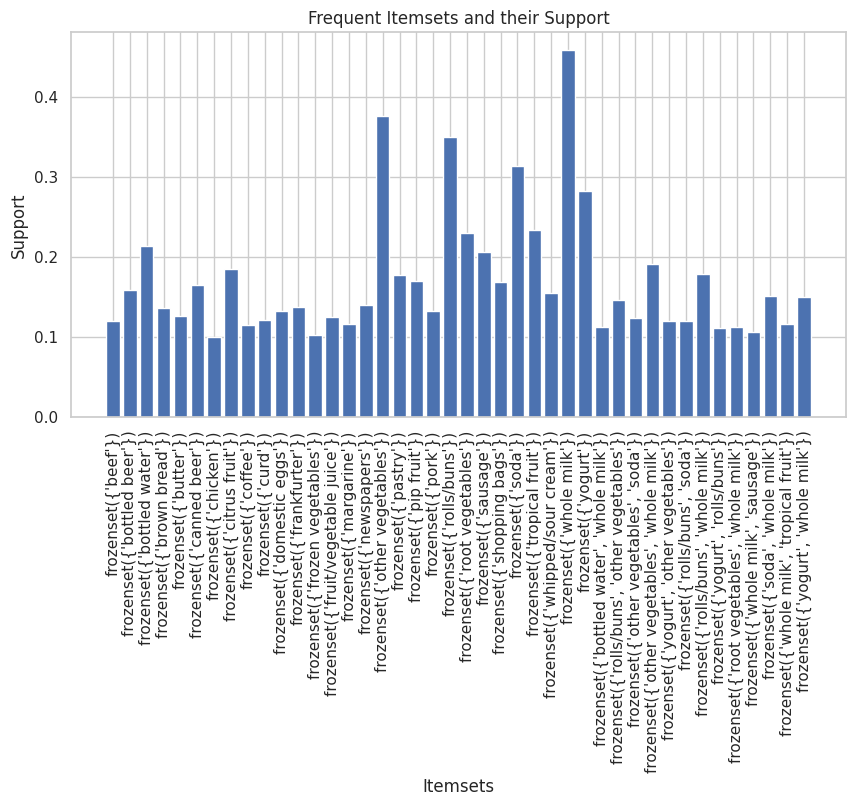

In [19]:
!pip install matplotlib
import matplotlib.pyplot as plt
# Assuming frequent_itemsets is a Pandas DataFrame with 'support' column
plt.figure(figsize=(10, 5))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'])
plt.xticks(rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets and their Support')
plt.show()

In [47]:
import pycaret

  Using cached numpy-1.21.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.0 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.2

Saving Groceries_dataset.csv to Groceries_dataset (2).csv
    support        itemsets
0  0.078502      (UHT-milk)
1  0.119548          (beef)
2  0.079785       (berries)
3  0.062083     (beverages)
4  0.158799  (bottled beer)
       antecedents   consequents  antecedent support  consequent support  \
0           (beef)  (whole milk)            0.119548            0.458184   
1   (bottled beer)  (whole milk)            0.158799            0.458184   
2  (bottled water)  (whole milk)            0.213699            0.458184   
3    (brown bread)  (whole milk)            0.135967            0.458184   
4         (butter)  (whole milk)            0.126475            0.458184   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.064135    0.536481  1.170886  0.009360    1.168919       0.165762  
1  0.085428    0.537964  1.174124  0.012669    1.172672       0.176297  
2  0.112365    0.525810  1.147597  0.014452    1.142615       0.163569  
3  0.069779    0.513208  

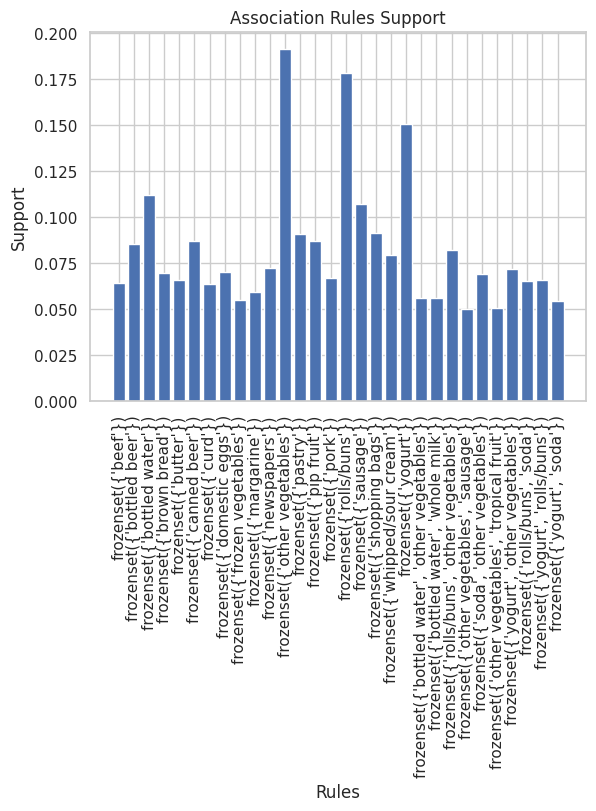

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pycaret.datasets import get_data

# Install necessary packages
!pip install mlxtend pycaret numpy==1.21.4 numba==0.53.0

# Load the 'groceries' dataset
from google.colab import files
uploads = files.upload()

dataset = pd.read_csv('Groceries_dataset.csv')
dataset.head()

# Convert dataset to list of transactions
transactions = dataset.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Convert transaction data to a format suitable for apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display frequent itemsets and rules
print(frequent_itemsets.head())
print(rules.head())

# Plot rules if desired (using matplotlib or seaborn)
# Example: simple bar plot of support for each rule
plt.bar(rules['antecedents'].astype(str), rules['support'])
plt.xticks(rotation=90)
plt.xlabel('Rules')
plt.ylabel('Support')
plt.title('Association Rules Support')
plt.show()


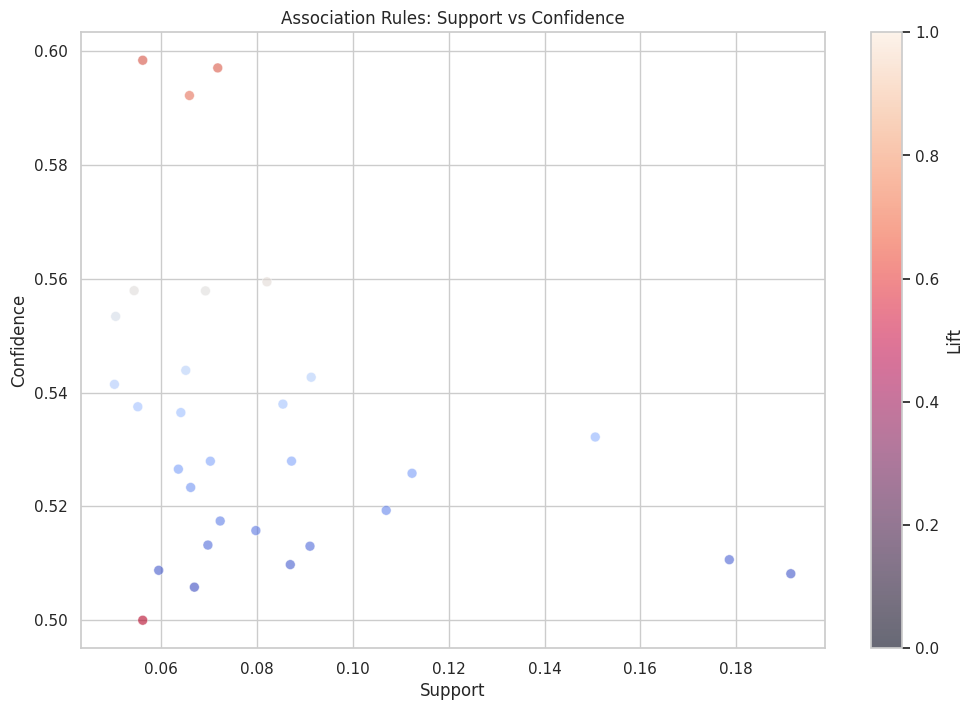

In [52]:
# Scatter plot: Support vs Confidence
plt.figure(figsize=(12, 8))
lift_values = rules['lift']
sizes = (lift_values - lift_values.min()) * 100  # Scale sizes based on lift
sizes = sizes.clip(lower=50)  # Ensure minimum size for visibility

# Color map based on lift value
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(lift_values.min(), lift_values.max())
colors = cmap(norm(lift_values))

scatter = plt.scatter(data=rules, x='support', y='confidence',
                      s=sizes,
                      c=colors,
                      alpha=0.6,
                      edgecolors='w',
                      linewidth=0.5)

plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(scatter, label='Lift')
plt.grid(True)
plt.show()


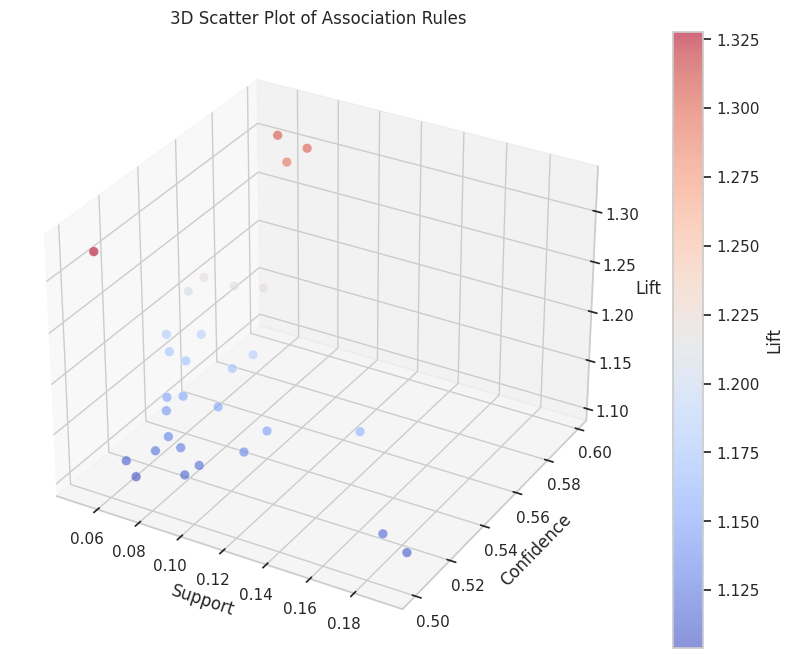

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot: Support vs Confidence vs Lift
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define axes data
x = rules['support']
y = rules['confidence']
z = rules['lift']

# Define sizes and colors based on lift
sizes = (z - z.min()) * 100  # Scale sizes based on lift
sizes = sizes.clip(lower=50)  # Ensure minimum size for visibility
colors = z  # Use lift as color

# Create the scatter plot
scatter = ax.scatter(x, y, z, s=sizes, c=colors, cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=0.5)

# Set labels
ax.set_title('3D Scatter Plot of Association Rules')
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Lift')

plt.show()
